<a href="https://colab.research.google.com/github/aliefAdityaa/Muhammad-Alief-Aditya-2/blob/main/Praktikum_DATA_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Travel Insurance Prediction Data**





In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler


## Business Understanding
### Business Objective
Tujuan bisnis dari dataset ini adalah mengetahui peluang inovasi dan menggembangkan produk unggulan, serta menerapkan teknologi baru seperti AI dan IoT untuk meningkatkan pengalaman pelanggan.
### Assess Situation
Situasi yang mendasari dataset ini adalah melakukan evaluasi mendalam terhadap kualitas dataset, memastikan kepatuhan terhadap regulasi privasi, dan mengidentifikasi potensi risiko etika terkait penggunaan data.
### Tujuan Data Mining
Tujuan Data mining dari dataset Travel Insurance Prediction Data adalah menerapkan teknik data mining untuk mengidentifikasi segmen pelanggan yang potensial dan mengarahkan strategi pemasaran secara lebih efektif. Lalu, Menggunakan data mining untuk personalisasi layanan dan penawaran asuransi perjalanan berdasarkan preferensi pelanggan.
### Rencana Proyek
Tahapan-tahapan yang akan dilakukan adalah
1. Membersihkan dan mempersiapkan data untuk analisis, termasuk penanganan nilai-nilai yang hilang dan normalisasi.
2. Mengevaluasi dan memperbarui model prediktif yang ada, termasuk peningkatan kinerja dan interpretabilitas.
3. Menerapkan hasil analisis untuk mengoptimalkan strategi pemasaran, termasuk segmentasi pelanggan dan personalisasi pesan.
4. Menerapkan solusi untuk meningkatkan manajemen risiko, termasuk identifikasi dan mitigasi risiko potensial.
5. Melakukan evaluasi reguler terhadap performa model, strategi pemasaran, dan proses underwriting untuk memastikan keberlanjutan dan perbaikan berkelanjutan.


# **Data Understanding**

## **Collect Initial Data**

Dataset yang berasal dari Kaggle ini ialah Dataset yang berisi informasi terkait prediksi asuransi perjalanan. Informasi ini dapat mencakup berbagai variabel, seperti data pelanggan, rincian perjalanan, dan apakah asuransi perjalanan dibeli atau tidak. Berikut link dataset tersebut : https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data/data

In [60]:
df = pd.read_csv('TravelInsurancePrediction.csv')
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


## **Describe Data**

### Informasi Dasar

In [61]:
print("Jumlah baris :", df.shape[0])
print("Jumlah kolom :", df.shape[1])

Jumlah baris : 1987
Jumlah kolom : 10


Dapat dilihat bahwasannya jumlah baris adalah berjumlah 1987 dan jumlah kolom adalah berjumlah 10.

### Informasi Lanjutan

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


KOLOM
1. Age = nilai usia pelanggan, jumlah = 1987, tipe data = integer
2. Employment Type = jenis pekerjaan atau tipe pekerjaan dari pelanggan, jumlah = 1987, tipe data = object
3. GraduateOrNot = berisi informasi apakah pelanggan lulus atau tidak lulus, jumlah = 1987, tipe data = object
4. AnnualIncome = nilai pendapatan tahunan pelanggan, jumlah = 1987, tipe data = integer
5. FamilyMembers =  jumlah anggota keluarga pelanggan, jumlah = 1987, tipe data = integer
6. ChronicDiseases = berisi informasi apakah pelanggan memiliki penyakit kronis atau tidak, jumlah = 1987, tipe data = integer
7. FrequentFlyer = berisi informasi apakah pelanggan sering terbang atau tidak, jumlah = 1987, tipe data = object
8. EverTravelledAbroad = berisi informasi apakah pelanggan pernah bepergian ke luar negeri atau tidak, jumlah = 1987, tipe data = object
9. TravelInsurance = berisi informasi apakah pelanggan membeli asuransi perjalanan atau tidak, jumlah = 1987, tipe data = integer

#### Informasi Statistik Deskriptif

In [63]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


1. Rata-rata usia adalah sekitar 29.65 tahun, dengan standar deviasi sekitar 2.91, menunjukkan sejauh mana data tersebar dari rata-rata.
2. Rata-rata pendapatan tahunan adalah sekitar 932,763, dengan variasi yang cukup signifikan (standar deviasi 376,855.7).
3. Rata-rata jumlah anggota keluarga adalah sekitar 4.75.
4. Sekitar 27.78% pelanggan memiliki penyakit kronis berdasarkan rata-rata.
5. Sekitar 35.73% pelanggan membeli asuransi perjalanan berdasarkan rata-rata.

## **Exploratory Data Analysis**

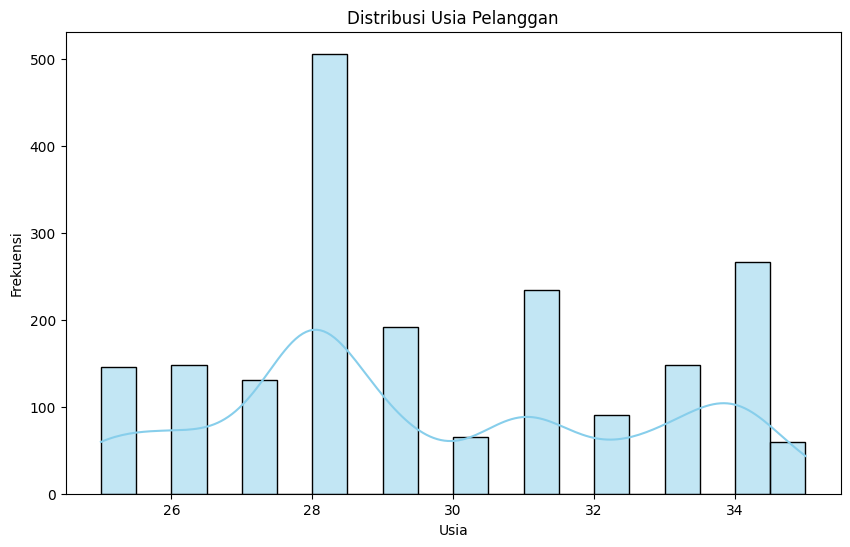

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

Sebagian besar pelanggan berada dalam rentang usia 25-35 tahun.

<ipython-input-67-502f55e73b18>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



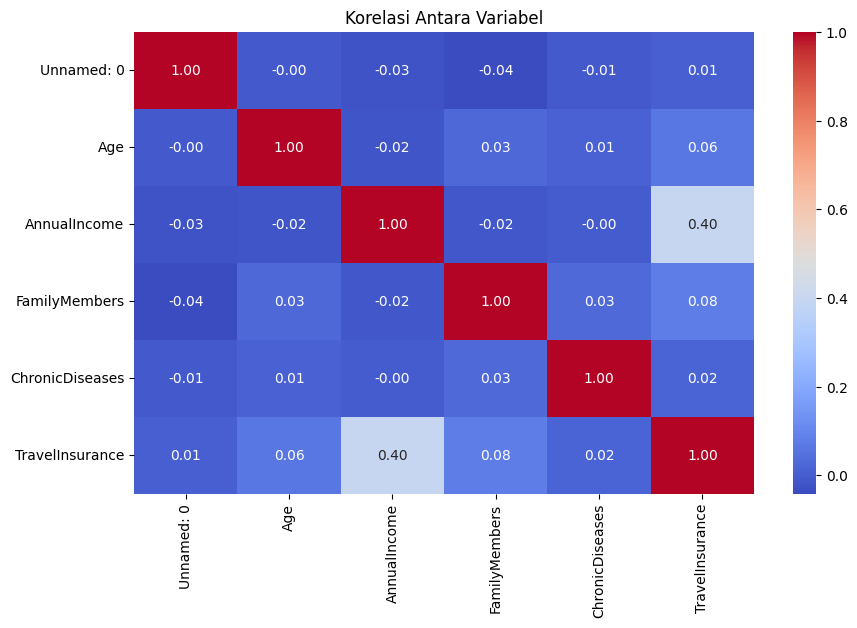

In [67]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antara Variabel')
plt.show()

Tidak ada korelasi yang kuat antara variabel-variabel numerik, menunjukkan bahwa fitur-fitur tersebut mungkin saling bebas.

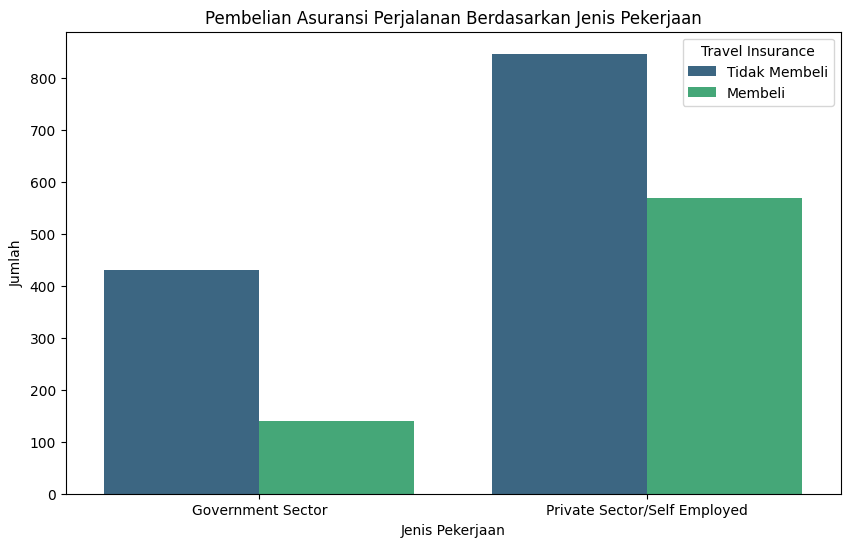

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Employment Type', hue='TravelInsurance', data=df, palette='viridis')
plt.title('Pembelian Asuransi Perjalanan Berdasarkan Jenis Pekerjaan')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Jumlah')
plt.legend(title='Travel Insurance', loc='upper right', labels=['Tidak Membeli', 'Membeli'])
plt.show()

Pelanggan yang bekerja mungkin memiliki kecenderungan lebih tinggi untuk membeli asuransi perjalanan dibandingkan dengan pelanggan yang tidak bekerja.
Jenis pekerjaan dapat memainkan peran penting dalam keputusan pembelian asuransi perjalanan.

## **Verify Data Quality**

#### Missing Values

In [65]:
missing_values = df.isnull().sum()
print("Jumlah nilai kosong pada setiap kolom :")
print(missing_values)

Jumlah nilai kosong pada setiap kolom :
Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64


Age: Usia pelanggan, tidak ada nilai kosong.
Employment Type: Jenis pekerjaan pelanggan, tidak ada nilai kosong.
GraduateOrNot: Informasi apakah pelanggan lulus atau tidak, tidak ada nilai kosong.
AnnualIncome: Pendapatan tahunan pelanggan, tidak ada nilai kosong.
FamilyMembers: Jumlah anggota keluarga pelanggan, tidak ada nilai kosong.
ChronicDiseases: Informasi apakah pelanggan memiliki penyakit kronis, tidak ada nilai kosong.
FrequentFlyer: Informasi apakah pelanggan sering terbang atau tidak, tidak ada nilai kosong.
EverTravelledAbroad: Informasi apakah pelanggan pernah bepergian ke luar negeri, tidak ada nilai kosong.
TravelInsurance: Informasi apakah pelanggan membeli asuransi perjalanan, tidak ada nilai kosong.

#### Outliers Values

In [68]:
def detect_outliers(column):
    column = pd.to_numeric(column, errors='coerce')
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

for column in df.columns:
    outliers = detect_outliers(df[column])
    print(f"Kolom '{column}':")
    print(f"- Jumlah outliers: {len(outliers)}")

Kolom 'Unnamed: 0':
- Jumlah outliers: 0
Kolom 'Age':
- Jumlah outliers: 0
Kolom 'Employment Type':
- Jumlah outliers: 0
Kolom 'GraduateOrNot':
- Jumlah outliers: 0
Kolom 'AnnualIncome':
- Jumlah outliers: 0
Kolom 'FamilyMembers':
- Jumlah outliers: 0
Kolom 'ChronicDiseases':
- Jumlah outliers: 0
Kolom 'FrequentFlyer':
- Jumlah outliers: 0
Kolom 'EverTravelledAbroad':
- Jumlah outliers: 0
Kolom 'TravelInsurance':
- Jumlah outliers: 0


Age: Usia pelanggan, tidak ada outliers. Tidak ada nilai yang dianggap sangat ekstrem atau tidak sesuai dengan distribusi umum usia.

Employment Type: Jenis pekerjaan pelanggan, tidak ada outliers. Kategori pekerjaan tidak memiliki nilai yang secara signifikan berbeda atau tidak sesuai.

GraduateOrNot: Informasi apakah pelanggan lulus atau tidak, tidak ada outliers. Kategori lulus atau tidak lulus tidak memiliki nilai yang dianggap sebagai pencilan.

AnnualIncome: Pendapatan tahunan pelanggan, tidak ada outliers. Tidak ada nilai yang dianggap sangat ekstrem dalam hal pendapatan tahunan.

FamilyMembers: Jumlah anggota keluarga pelanggan, tidak ada outliers. Distribusi jumlah anggota keluarga tidak memiliki nilai yang dianggap sebagai pencilan.

ChronicDiseases: Informasi apakah pelanggan memiliki penyakit kronis, tidak ada outliers. Kategori penyakit kronis atau tidak tidak memiliki nilai yang dianggap sebagai pencilan.

FrequentFlyer: Informasi apakah pelanggan sering terbang atau tidak, tidak ada outliers. Kategori sering terbang atau tidak tidak memiliki nilai yang dianggap sebagai pencilan.

EverTravelledAbroad: Informasi apakah pelanggan pernah bepergian ke luar negeri, tidak ada outliers. Kategori pernah bepergian atau tidak tidak memiliki nilai yang dianggap sebagai pencilan.

TravelInsurance: Informasi apakah pelanggan membeli asuransi perjalanan, tidak ada outliers. Kategori membeli atau tidak tidak memiliki nilai yang dianggap sebagai pencilan.

#### Duplicated Values

In [69]:
for column in df.columns:
    duplicate_rows = df[df.duplicated(column)]
    print(f"Kolom '{column}' memiliki {len(duplicate_rows)} nilai duplikat.")

Kolom 'Unnamed: 0' memiliki 0 nilai duplikat.
Kolom 'Age' memiliki 1976 nilai duplikat.
Kolom 'Employment Type' memiliki 1985 nilai duplikat.
Kolom 'GraduateOrNot' memiliki 1985 nilai duplikat.
Kolom 'AnnualIncome' memiliki 1957 nilai duplikat.
Kolom 'FamilyMembers' memiliki 1979 nilai duplikat.
Kolom 'ChronicDiseases' memiliki 1985 nilai duplikat.
Kolom 'FrequentFlyer' memiliki 1985 nilai duplikat.
Kolom 'EverTravelledAbroad' memiliki 1985 nilai duplikat.
Kolom 'TravelInsurance' memiliki 1985 nilai duplikat.


Age:

Jumlah nilai duplikat: 1976
Penjelasan: Terdapat 1976 nilai duplikat dalam kolom usia. Ini menunjukkan bahwa beberapa nilai usia mungkin muncul lebih dari sekali dalam dataset. Pada analisis lebih lanjut, perlu diperiksa apakah duplikasi ini dapat dijelaskan oleh keberadaan beberapa pelanggan dengan usia yang sama.
Employment Type:

Jumlah nilai duplikat: 1985
Penjelasan: Seluruh nilai dalam kolom jenis pekerjaan muncul lebih dari sekali dalam dataset. Ini bisa jadi karena beberapa jenis pekerjaan memiliki jumlah pelanggan yang sama.
GraduateOrNot:

Jumlah nilai duplikat: 1985
Penjelasan: Seluruh nilai dalam kolom lulus atau tidak lulus muncul lebih dari sekali dalam dataset. Hal ini bisa disebabkan oleh beberapa pelanggan memiliki status lulus yang sama.
AnnualIncome:

Jumlah nilai duplikat: 1957
Penjelasan: Terdapat 1957 nilai duplikat dalam kolom pendapatan tahunan. Ini menunjukkan bahwa beberapa nilai pendapatan tahunan mungkin muncul lebih dari sekali dalam dataset. Dalam analisis lebih lanjut, perlu diperiksa apakah duplikasi ini dapat dijelaskan oleh keberadaan beberapa pelanggan dengan pendapatan tahunan yang sama.
FamilyMembers:

Jumlah nilai duplikat: 1979
Penjelasan: Terdapat 1979 nilai duplikat dalam kolom jumlah anggota keluarga. Ini menunjukkan bahwa beberapa nilai jumlah anggota keluarga mungkin muncul lebih dari sekali dalam dataset.
ChronicDiseases:

Jumlah nilai duplikat: 1985
Penjelasan: Seluruh nilai dalam kolom penyakit kronis muncul lebih dari sekali dalam dataset. Hal ini bisa disebabkan oleh beberapa pelanggan memiliki status penyakit kronis yang sama.
FrequentFlyer:

Jumlah nilai duplikat: 1985
Penjelasan: Seluruh nilai dalam kolom sering terbang atau tidak muncul lebih dari sekali dalam dataset. Hal ini bisa disebabkan oleh beberapa pelanggan memiliki status sering terbang atau tidak yang sama.
EverTravelledAbroad:

Jumlah nilai duplikat: 1985
Penjelasan: Seluruh nilai dalam kolom pernah bepergian ke luar negeri atau tidak muncul lebih dari sekali dalam dataset. Hal ini bisa disebabkan oleh beberapa pelanggan memiliki status pernah bepergian atau tidak yang sama.
TravelInsurance:

Jumlah nilai duplikat: 1985
Penjelasan: Seluruh nilai dalam kolom pembelian asuransi perjalanan muncul lebih dari sekali dalam dataset. Ini menunjukkan bahwa beberapa pelanggan memiliki keputusan pembelian asuransi perjalanan yang sama.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aliefAdityaa/datamining/main/TravelInsurancePrediction.csv')
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


#DATA PREPARATION

##DATA CLEANING

##PENANGANAN MISSING VALUES

####PENANGANAN MISSING VALUES

In [ ]:
pd.DataFrame(df.isna().sum() /len(df)*100)

,0
Unnamed: 0,0.0
Age,0.0
Employment Type,0.0
GraduateOrNot,0.0
AnnualIncome,0.0
FamilyMembers,0.0
ChronicDiseases,0.0
FrequentFlyer,0.0
EverTravelledAbroad,0.0
TravelInsurance,0.0


Dapat dilihat bahwa tidak terdapat nilai yang hilang / kosong, yang berarti pengumpulan data yang telah dilakukan berhasil karena lengkap dan konsisten.

####HAPUS MISSING VALUE

Berdasarkan data yang diperoleh dari [Pengecekan Missing Value](#pengecekan-missing-value) tidak terdapat nilai yang hilang atau kosong, maka hal ini tidak perlu dilakukan.

#####Imputasi Missing Value

Berdasarkan data yang diperoleh dari [Pengecekan Missing Value](#pengecekan-missing-value) tidak terdapat nilai yang hilang atau kosong, maka hal ini tidak perlu dilakukan.

####Pengecekkan Nilai Duplikat

In [ ]:
df[df.duplicated()]

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance


Berdasarkan hasil di atas, terdapat baris kosong dalam setiap kolom. Artinya, tidak ada data yang terduplikasi.

####HAPUS NILAI DUPLIKASI

#####Pengecekkan Nilai Duplikat

In [ ]:
df = df.drop_duplicates()

Berdasarkan pengecekan nilai duplikat di atas, nilai yang terduplikat akan dihapus secara otomatis. Jika tidak ada nilai duplikat, maka tidak akan ada perubahan yang terjadi.

###**Penanganan Outliers**

#####Pengecekkan Outliers

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Unnamed: 0,0.0
Age,0.0
AnnualIncome,0.0
FamilyMembers,0.0
ChronicDiseases,0.0
TravelInsurance,0.0


Berdasarkan hasil diatas, dapat dilihat bahwa kelima kolom tersebut memiliki nilai outliers sebesar **0.0**. Artinya, tidak ada data yang nilainya terlalu jauh dari nilai-nilai lainnya.

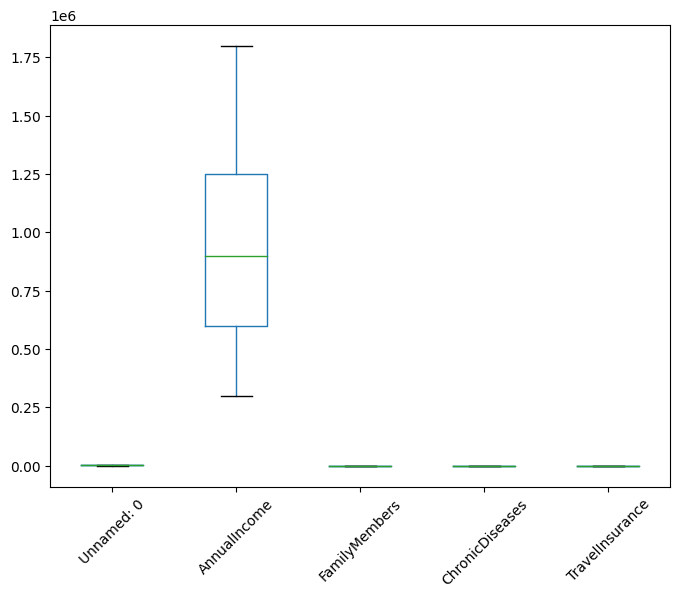

In [ ]:
boxplot = df.drop('Age', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Dari grafik diatas, tidak ditemukan nilai yang jauh dari jangkauan.

#####Hapus Outliers

Berdasarkan data yang diperoleh dari [Pengecekan Outliers](#Pengecekkan-Outliers) tidak ditemukan nilainya terlalu jauh dari nilai-nilai lainnya.

Berdasarkan data yang diperoleh dari [Pengecekan Outliers](#Pengecekkan-Outliers) tidak ditemukan nilainya terlalu jauh dari nilai-nilai lainnya.

#####Pengecekkan Ulang

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Unnamed: 0,0.0
Age,0.0
AnnualIncome,0.0
FamilyMembers,0.0
ChronicDiseases,0.0
TravelInsurance,0.0


Setelah dilakukan pengecekkan ulang, tidak ditemukan nilai yang terlalu jauh dari nilai-nilai lainnya.

##**Construct Data**

####Melakukan Rekayasa Fitur (Feature Engineering)

In [ ]:
def categorize_age(age):
    if age < 25:
        return 'Teens'
    elif 25 <= age < 45:
        return 'Adult'
    else:
        return 'Elderly'

df['Age Category'] = df['Age'].apply(categorize_age)

####Pengecekkan Hasil

In [ ]:
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Age Category
0,0,31,Government Sector,Yes,400000,6,1,No,No,0,Adult
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,Adult
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,Adult
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,Adult
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,Adult
...,...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1,Adult
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0,Adult
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0,Adult
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1,Adult


Berdasarkan data diatas, terdapat kolom baru yang bernama **Age Category** yang digunakan untuk menyimpan data sesuai dengan kategori usia dan **Spending Category** yang digunakan untuk menyimpan data sesuai dengan kategori pembelian sebelumnya.

##**Data Reduction**

####Mengurangi Fitur -Fitur yang Kurang Relevan

In [ ]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [ ]:
df2 = df.drop(['ChronicDiseases', 'GraduateOrNot'], axis = 1)

Menghapus kolom **Subscription Status dan Preferred Payment Method** karena kurang relevan. Kolom tersebut dihapus karena untuk menyederhanakan analisis dan memusatkan perhatian kepada kolom-kolom yang lebih penting.

####Pengecekkan Hasil

In [ ]:
df2

,Unnamed: 0,Age,Employment Type,AnnualIncome,FamilyMembers,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Age Category
0,0,31,Government Sector,400000,6,No,No,0,Adult
1,1,31,Private Sector/Self Employed,1250000,7,No,No,0,Adult
2,2,34,Private Sector/Self Employed,500000,4,No,No,1,Adult
3,3,28,Private Sector/Self Employed,700000,3,No,No,0,Adult
4,4,28,Private Sector/Self Employed,700000,8,Yes,No,0,Adult
...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,1500000,4,Yes,Yes,1,Adult
1983,1983,28,Private Sector/Self Employed,1750000,5,No,Yes,0,Adult
1984,1984,28,Private Sector/Self Employed,1150000,6,No,No,0,Adult
1985,1985,34,Private Sector/Self Employed,1000000,6,Yes,Yes,1,Adult


Dapat dilihat pada tabel diatas bahwa kolom **Subscription Status dan Preferred Payment Method** yang tadinya ada, namun setelah dilakukan pemfilteran data kolom-kolom tersebut telah dihapus karena kurang relevan.

##**Data Transformation**

####Mapping

In [ ]:
df2 ['Age Category'] = df2['Age Category'].map({'Teens' : 0, 'Adult' : 1, 'Elderly' : 2})
df2 ['Employment Type'] = df2['Employment Type'].map({'Government Sector' : 0, 'Private Sector/Self Employed' : 1})

In [ ]:
df2

,Unnamed: 0,Age,Employment Type,AnnualIncome,FamilyMembers,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Age Category
0,0,31,0,400000,6,No,No,0,1
1,1,31,1,1250000,7,No,No,0,1
2,2,34,1,500000,4,No,No,1,1
3,3,28,1,700000,3,No,No,0,1
4,4,28,1,700000,8,Yes,No,0,1
...,...,...,...,...,...,...,...,...,...
1982,1982,33,1,1500000,4,Yes,Yes,1,1
1983,1983,28,1,1750000,5,No,Yes,0,1
1984,1984,28,1,1150000,6,No,No,0,1
1985,1985,34,1,1000000,6,Yes,Yes,1,1


Pada hasil di atas dengan menggunakan mapping yang bertujuan untuk memberikan klasifikasi numerik yang dapat diproses oleh model. Berikut adalah penjelasannya :
1. Klasifikasi numerik kepada setiap kategori umur guna memudahkan analisis data. Dalam hal ini, kategori umur **"Teens"** direpresentasikan dengan angka **0**, **"Adult"** dengan angka **1** dan **"Elderly"** dengan angka **2**. Hal ini dilakukan untuk membantu dalam mengelompokkan data dan memahami distribusi kategori umur dalam dataset dengan lebih efisien.
2. Klasifikasi numerik kepada setiap jenis pekerjaan guna memudahkan analisis data. Dalam hal ini, jenis pekerjaan **"Government Sector"** direpresentasikan dengan angka **0**,dan **"Private Sector/Self Employed"** dengan angka **1**. Hal ini dilakukan untuk membantu dalam mengelompokkan data dan memahami distribusi jenis pekerjaan dalam dataset dengan lebih efisien.

In [70]:
df.to_csv('Data Cleaned.csv',index=False)